# ***GA Trading Strategy Optimizer***


In [7]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import yfinance as yf

# Project module imports
from ga_core import run_ga
from fitness_function import data, apply_indicators, backtest_and_metrics
from indicator_functions import *
from ga_config import *


/content/fitness_function.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^NSEI", start="2007-01-01", end="2020-12-31", progress=False)


In [8]:
print("GA Parameter Ranges:")
pprint(PARAM_RANGES)

print("Running Genetic Algorithm... (This may take time)")
best_chromosome, best_fitness = run_ga()

print("\n Best Chromosome:")
for key, val in zip(PARAM_RANGES.keys(), best_chromosome):
    print(f"{key}: {val}")

print(f"\n Fitness Score: {round(best_fitness, 2)}")

GA Parameter Ranges:
{'atr_period': (5, 30),
 'fast_ma': (5, 30),
 'ma_type': [0, 1, 2, 3],
 'rsi_length': (5, 30),
 'rsi_oversold': (10, 40),
 'sl_multiplier': (0.5, 5.0),
 'slow_ma': (20, 100),
 'tp_multiplier': (0.5, 5.0)}
Running Genetic Algorithm... (This may take time)
Gen 001 | Best Score: 135985.27 | Best Chromosome: [1, 5, 68, 14, 38, 29, 1.7, 5.0]
Gen 002 | Best Score: 162066.71 | Best Chromosome: [0, 10, 45, 5, 34, 11, 3.1, 4.3]
Gen 003 | Best Score: 162066.71 | Best Chromosome: [0, 10, 45, 5, 34, 11, 3.1, 4.3]
Gen 004 | Best Score: 162066.71 | Best Chromosome: [0, 10, 45, 5, 34, 11, 3.1, 4.3]
Gen 005 | Best Score: 217065.54 | Best Chromosome: [0, 19, 23, 9, 28, 13, 4.3, 2.7]
Gen 006 | Best Score: 232377.86 | Best Chromosome: [3, 25, 24, 6, 30, 7, 3.3, 3.4]
Gen 007 | Best Score: 232377.86 | Best Chromosome: [3, 25, 24, 6, 30, 7, 3.3, 3.4]
Gen 008 | Best Score: 232377.86 | Best Chromosome: [3, 25, 24, 6, 30, 7, 3.3, 3.4]
Gen 009 | Best Score: 236504.11 | Best Chromosome: [3, 

In [9]:
df = data.copy()
df = apply_indicators(df.copy(), best_chromosome)
stats = backtest_and_metrics(df, best_chromosome)

print("\n Final In-Sample Backtest Stats:")
for k in ['cagr', 'sharpe', 'max_drawdown', 'num_trades', 'win_rate', 'net_profit']:
    val = stats[k]
    if isinstance(val, float):
        print(f"{k.title()}: {round(val, 2)}")
    else:
        print(f"{k.title()}: {val}")



 Final In-Sample Backtest Stats:
Cagr: 0.07
Sharpe: 33.62
Max_Drawdown: 0.02
Num_Trades: 12
Win_Rate: 0.92
Net_Profit: 1280809.12


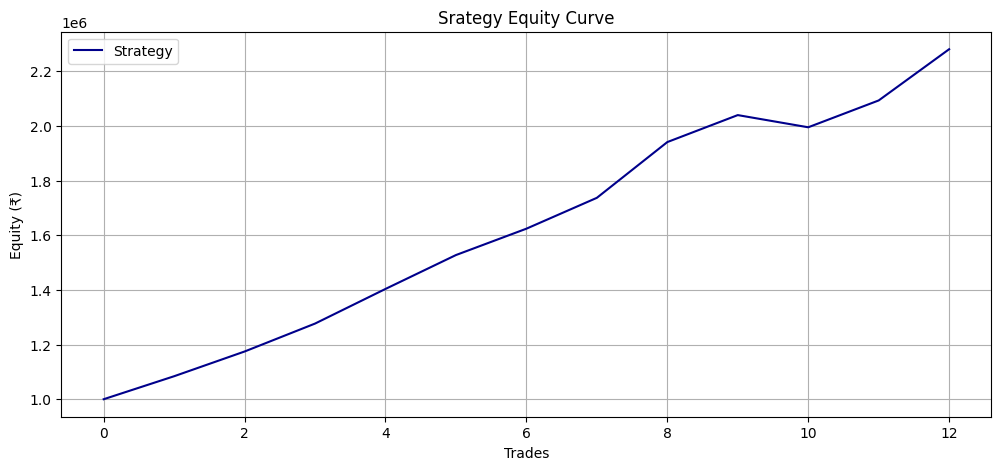

In [10]:
# Plot Strategy Curve
plt.figure(figsize=(12, 5))
plt.plot(stats['equity_curve'], label="Strategy", color='darkblue')
plt.title("Srategy Equity Curve")
plt.xlabel("Trades")
plt.ylabel("Equity (₹)")
plt.legend()
plt.grid(True)
plt.show()


 Max Drawdown: -2.19%


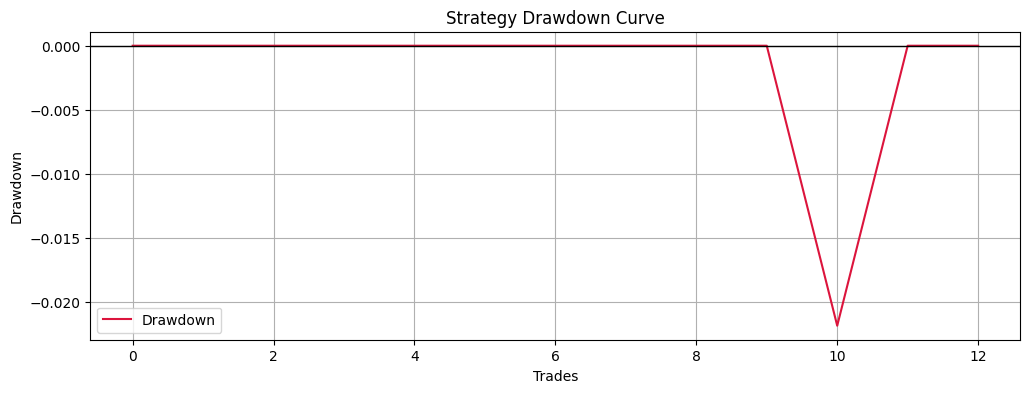

In [11]:
# Strategy Drawdown Calculation
equity =  pd.Series(stats['equity_curve'])
rolling_max = equity.cummax()
drawdown = equity / rolling_max - 1
max_dd = drawdown.min()

print(f"\n Max Drawdown: {round(max_dd * 100, 2)}%")

# Plot Drawdown Curve
plt.figure(figsize=(12, 4))
plt.plot(drawdown, color='crimson', label="Drawdown")
plt.axhline(0, color='black', linewidth=1)
plt.title("Strategy Drawdown Curve")
plt.xlabel("Trades")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Out of Sample Data Testing

df_oos = yf.download("^NSEI", start="2021-01-01", end="2024-12-31", progress=False)
df_oos.columns = [col[0] for col in data.columns]
df_oos.dropna(inplace=True)
df_oos.rename(columns={'C': 'Close','O': 'Open','H': 'High','L': 'Low'}, inplace=True)
df_oos


df_oos = apply_indicators(df_oos.copy(), best_chromosome)
stats_oos = backtest_and_metrics(df_oos, best_chromosome)

# OOS Metrics
print("\n Out-of-Sample Backtest Stats:")
for k in ['cagr', 'sharpe', 'max_drawdown', 'num_trades', 'win_rate', 'net_profit']:
    val = stats_oos[k]
    if isinstance(val, float):
        print(f"{k.title()}: {round(val, 2)}")
    else:
        print(f"{k.title()}: {val}")

/tmp/ipython-input-12-3038507521.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_oos = yf.download("^NSEI", start="2021-01-01", end="2024-12-31", progress=False)



 Out-of-Sample Backtest Stats:
Cagr: 0.01
Sharpe: 7.65
Max_Drawdown: 0.03
Num_Trades: 2
Win_Rate: 0.5
Net_Profit: 56834.68


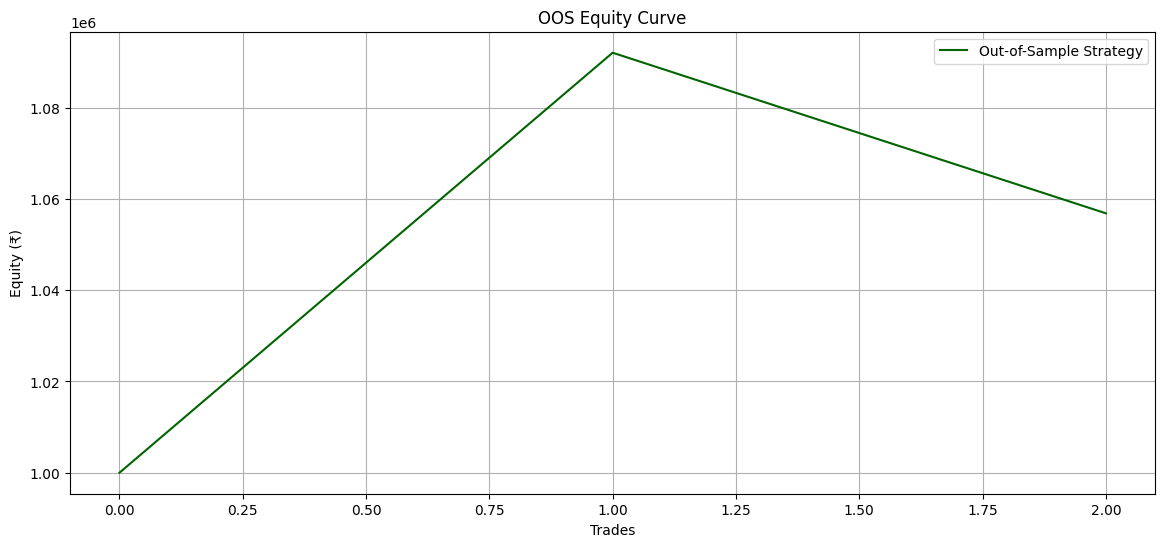

In [13]:
plt.figure(figsize=(14, 6))


# Out-of-Sample Strategy
plt.plot(stats_oos['equity_curve'], label="Out-of-Sample Strategy", color='darkgreen')

plt.title("OOS Equity Curve")
plt.xlabel("Trades")
plt.ylabel("Equity (₹)")
plt.legend()
plt.grid(True)
plt.show()

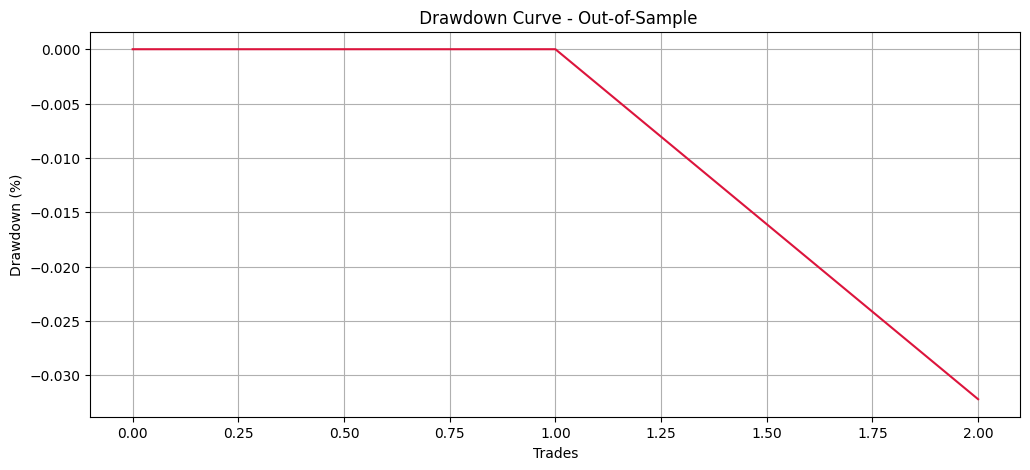

In [14]:
# Calculate OOS Drawdown
equity_oos = pd.Series(stats_oos['equity_curve'])
rolling_max_oos = equity_oos.cummax()
drawdown_oos = (equity_oos - rolling_max_oos) / rolling_max_oos

# Plot OOS Drawdown
plt.figure(figsize=(12, 5))
plt.plot(drawdown_oos, color='crimson')
plt.title(" Drawdown Curve - Out-of-Sample")
plt.xlabel("Trades")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.show()


In [15]:
# Display summary nicely
summary_df = pd.DataFrame({
    'In-Sample': [stats[k] for k in ['cagr', 'sharpe', 'max_drawdown', 'win_rate', 'num_trades', 'net_profit']],
    'Out-of-Sample': [stats_oos[k] for k in ['cagr', 'sharpe', 'max_drawdown', 'win_rate', 'num_trades', 'net_profit']]
}, index=['CAGR', 'Sharpe', 'Max Drawdown', 'Win Rate', 'Trades', 'Net Profit'])

summary_df.style.format("{:.2f}")

,In-Sample,Out-of-Sample
CAGR,0.07,0.01
Sharpe,33.62,7.65
Max Drawdown,0.02,0.03
Win Rate,0.92,0.50
Trades,12.00,2.00
Net Profit,1280809.12,56834.68
